<a href="https://colab.research.google.com/github/NirvanaDogra/DataViz/blob/main/IS445_Dogra_Nirvana_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**•What is the "name" of the dataset?**

Stop Sheet results from the City of Urbana, since the Stop Sheet collection began in 2016. Not all Stop Sheets are submitted to the Illinois Department of Transportation (IDOT), so there is a field that indicates if the record is one that would be sent to the State.

**•Where did you obtain it?**

| Field | Value |
| --- | --- |
| Author | Webmaster |
| Maintainer | Webmaster |
| Last Updated | December 27, 2019, 11:11 AM (UTC-06:00) |
| Created | August 21, 2018, 3:59 PM (UTC-05:00) |


**•Where can we obtain it? (i.e., URL)**

https://data.illinois.gov/dataset/stop-sheets

**•What is the license of the dataset? What are we allowed to do with it?**

Public Domain

**•How big is it in file size and in items?**

| Field | Value |
| --- | --- |
| Number of records | 5271 records |
| File Size | 3MB |


In [1]:
from IPython.display import HTML
HTML('<iframe width="1000" height="400" src="https://data.illinois.gov/dataset/stop-sheets/resource/39f7ce1d-1e8f-425a-beeb-0d4e78e0b6b7/view/452fde64-d83e-4636-803b-0f8a947f281c" frameborder="0"></iframe>')


/usr/local/lib/python3.9/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
import pandas as pd

In [3]:
!curl -o file.csv https://data.illinois.gov/dataset/66549e2b-0a6b-4a3d-8f34-3fca38fb7d5f/resource/39f7ce1d-1e8f-425a-beeb-0d4e78e0b6b7/download/idot_stop_sheet_output_20191226_114521.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2927k    0 2927k    0     0  1632k      0 --:--:--  0:00:01 --:--:-- 1632k


In [4]:
df = pd.read_csv('./file.csv')

1. 'STOP DATE' and 'STOP TIME' refer to the date and time when the police stopped the individual.
2. 'SENT TO STATE' refers to whether the incident was reported to the state authorities or not.
3. 'GEO CODE' is likely a geographic code or location identifier for the area where the stop occurred.
4. 'ANONYMOUS HOUSE NUMBER', 'ADDRESS STREET', and 'CROSS STREET' provide information on the location of the stop.
'RACE DESCRIPTION', 'SEX DESCRIPTION', 'AGE IN YEARS (at time of contact)', and 'RESIDENCY CODE' are details about the person who was stopped.
5. 'PAT-DOWN FRISK CONDUCTED' indicates whether the police conducted a pat-down search on the individual.
6. 'SEARCH CONDUCTED' indicates whether a more extensive search was conducted, possibly including the individual's belongings or vehicle.
7. 'CITATION ISSUED' and 'ARREST MADE' indicate whether the police took any action against the individual after the stop.
8. The various 'REASON FOR STOP' and 'REASON FOR FRISK' categories provide more detailed information about the circumstances and justification for the stop and any subsequent frisk. These reasons may include radio broadcast communication of a potential crime or suspicious activity, fitting a suspect description, casing or observing suspicious behavior, proximity to a crime or high crime area, or suspicion of gang activity or drug transactions.

9. 'FRISK CONDUCTED BY' and 'SEARCH CONDUCTED BY' categories indicate which officer or officers conducted the pat-down or search.

10.  'REASON FOR SEARCH' categories describe the justification for any more extensive search beyond a pat-down, which may include suspicion of drugs, hard objects, firearms, or other weapons. 
11. 'CONTRABAND FOUND' categories document any illegal or prohibited items discovered during the search, such as drugs, drug paraphernalia, alcohol, weapons, or stolen property.

12. 'MAPPING ADDRESS' category refer to the address or location of the incident, possibly for mapping or data analysis purposes.


In [5]:
df.columns

Index(['STOP DATE', 'STOP TIME', 'SENT TO STATE', 'INCIDENT NUMBER',
       'STOP TYPE DESCRIPTION', 'GEO CODE', 'ANONYMOUS HOUSE NUMBER',
       'ADDRESS STREET', 'CROSS STREET', 'RACE DESCRIPTION', 'SEX DESCRIPTION',
       'RESIDENCY CODE', 'AGE IN YEARS (at time of contact)',
       'PAT-DOWN FRISK CONDUCTED', 'SEARCH CONDUCTED', 'CITATION ISSUED',
       'ARREST MADE', 'REASON FOR STOP - DRUG TRANSACTION',
       'REASON FOR STOP - RADIO BROADCAST CFS',
       'REASON FOR STOP - FITS DESCRIPTION', 'REASON FOR STOP - CASING',
       'REASON FOR STOP - PROXIMITY', 'REASON FOR STOP - GANG ENFORCEMENT',
       'REASON FOR STOP - SUSPICIOUS ACTIVITY', 'REASON FOR STOP - OTHER',
       'FRISK CONDUCTED BY', 'REASON FOR FRISK - ADMINISTRATIVE',
       'REASON FOR FRISK - VERBAL THREATS',
       'REASON FOR FRISK - CRIMINAL VIOLENT BEHAVIOR',
       'REASON FOR FRISK - VIOLENT BEHAVIOR',
       'REASON FOR FRISK - VIOLENT CRIME',
       'REASON FOR FRISK - SUSPICIOUS BULGE', 'REASON FOR F

In [6]:
df['date'] = pd.to_datetime(df['STOP DATE'])
df['year'] = df['date'].dt.year

In [7]:
# pd.to_datetime(df['STOP TIME'], format='%HH:%MM')
df['STOP TIME'] = df['STOP TIME'].replace('24:00', '00:00')
df['time'] = pd.to_datetime(df['STOP TIME'], format='%H:%M').dt.strftime('%H:%M')


In [26]:
import matplotlib.pyplot as plt


In [9]:
x = []
y = []
for yr in df['year'].unique():
  group = df[df['year'] == yr]
  x.append(str(yr))
  y.append(len(group))

The chart below we can observe that the number of police incidents by year has been declining over the years. 2019 had the lowest number of incidents

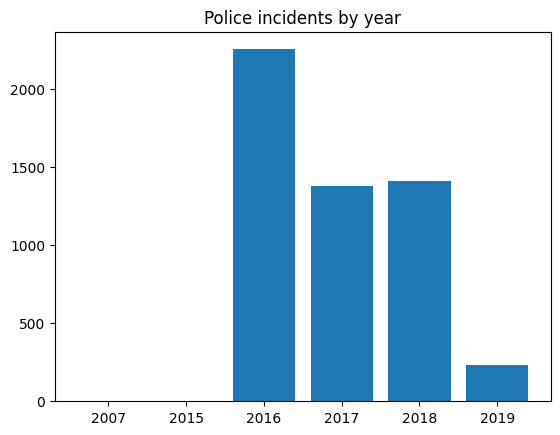

In [119]:
plt.bar(x[::-1], y[::-1])
plt.title("Police incidents by year")
plt.show()

The number of incidents is highest between the age goups of 10-30.

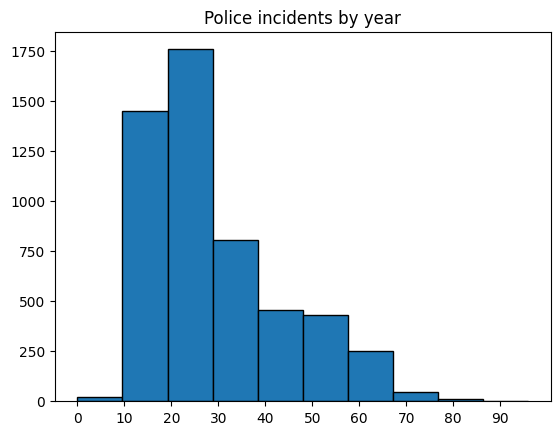

In [120]:
plt.hist(df['AGE IN YEARS (at time of contact)'], 10, edgecolor='black')
plt.xticks([x for x in range(0, 100, int(100/10))])
plt.title("Police incidents by year")
plt.show()

In the graph below we can observer that males tend to commit more crimes than men.

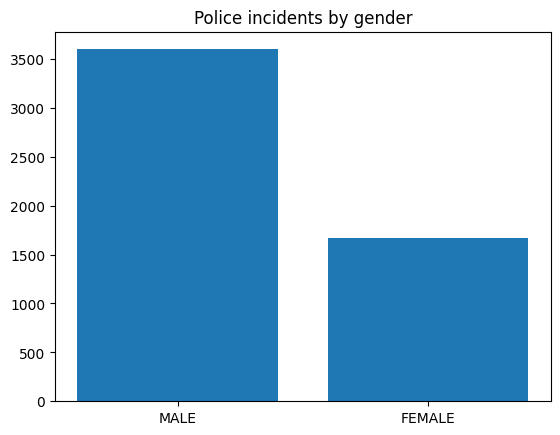

In [121]:
from collections import Counter 
c = Counter(df['SEX DESCRIPTION']) 
plt.bar(c.keys(), c.values())
plt.title("Police incidents by gender")
plt.show()


In the graph below we can observer, that most crimes are commited by Black or African American and white communities.

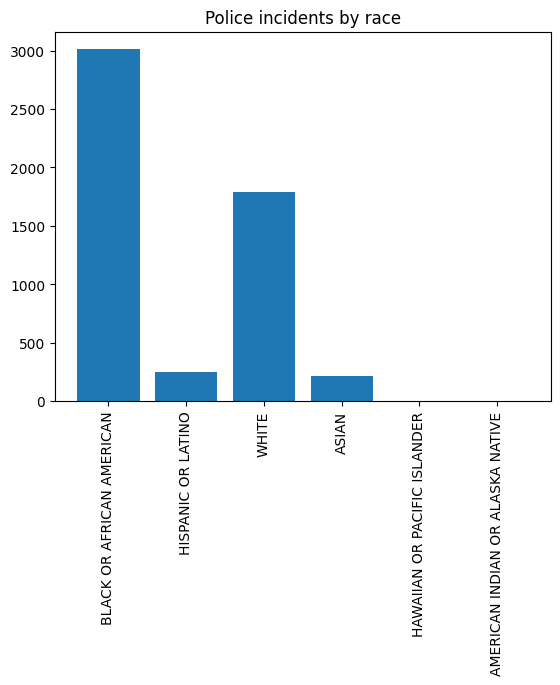

In [122]:
from collections import Counter 
c = Counter(df['RACE DESCRIPTION']) 
plt.bar(c.keys(), c.values())
plt.xticks(rotation = 90)
plt.title("Police incidents by race")
plt.show()


In the graph below we can observer that most reason for stopping is CFS*


* A Call for Service (CFS) can be generated by a civilian requesting police assistance or it can be initiated by an officer while on patrol.

<ipython-input-123-851c39bf8b7a>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(c.keys(), rotation=90)


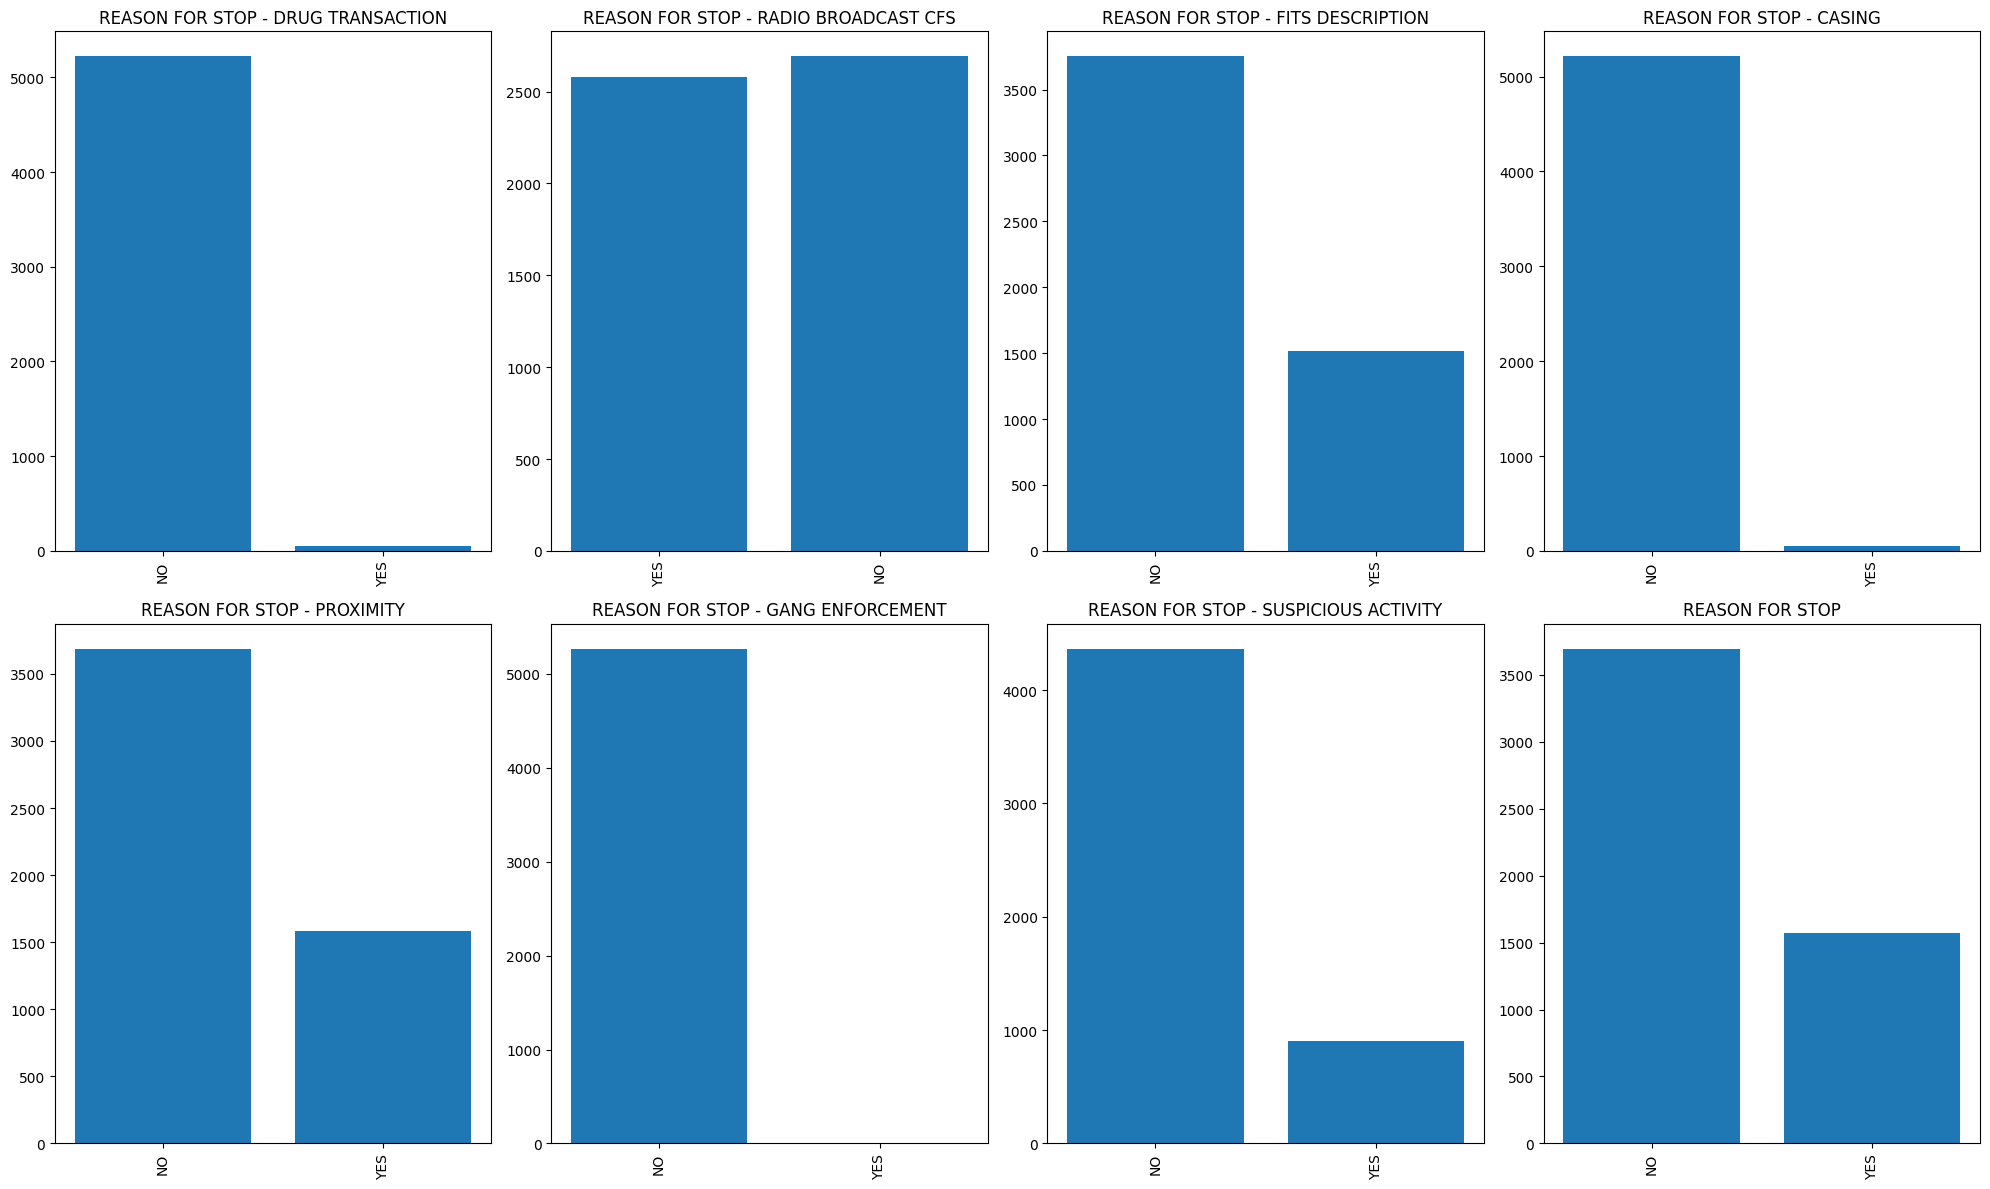

In [123]:
subset = df[['REASON FOR STOP - DRUG TRANSACTION',
       'REASON FOR STOP - RADIO BROADCAST CFS',
       'REASON FOR STOP - FITS DESCRIPTION', 
       'REASON FOR STOP - CASING',
       'REASON FOR STOP - PROXIMITY', 
       'REASON FOR STOP - GANG ENFORCEMENT',
       'REASON FOR STOP - SUSPICIOUS ACTIVITY', 
       'REASON FOR STOP - OTHER',
       ]]

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
axs = axs.ravel()

for i, col in enumerate(subset.columns):
    data = subset[col]
    c = Counter(data)
    axs[i].bar(c.keys(), c.values())
    axs[i].set_xticklabels(c.keys(), rotation=90)
    axs[i].set_title(col)

plt.tight_layout()
plt.title("REASON FOR STOP")
plt.show()


In the graph below we can observer that we can observe that in most cases the reason for frisk is others.

<ipython-input-27-9d16e252ac1c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(c.keys(), rotation=90)


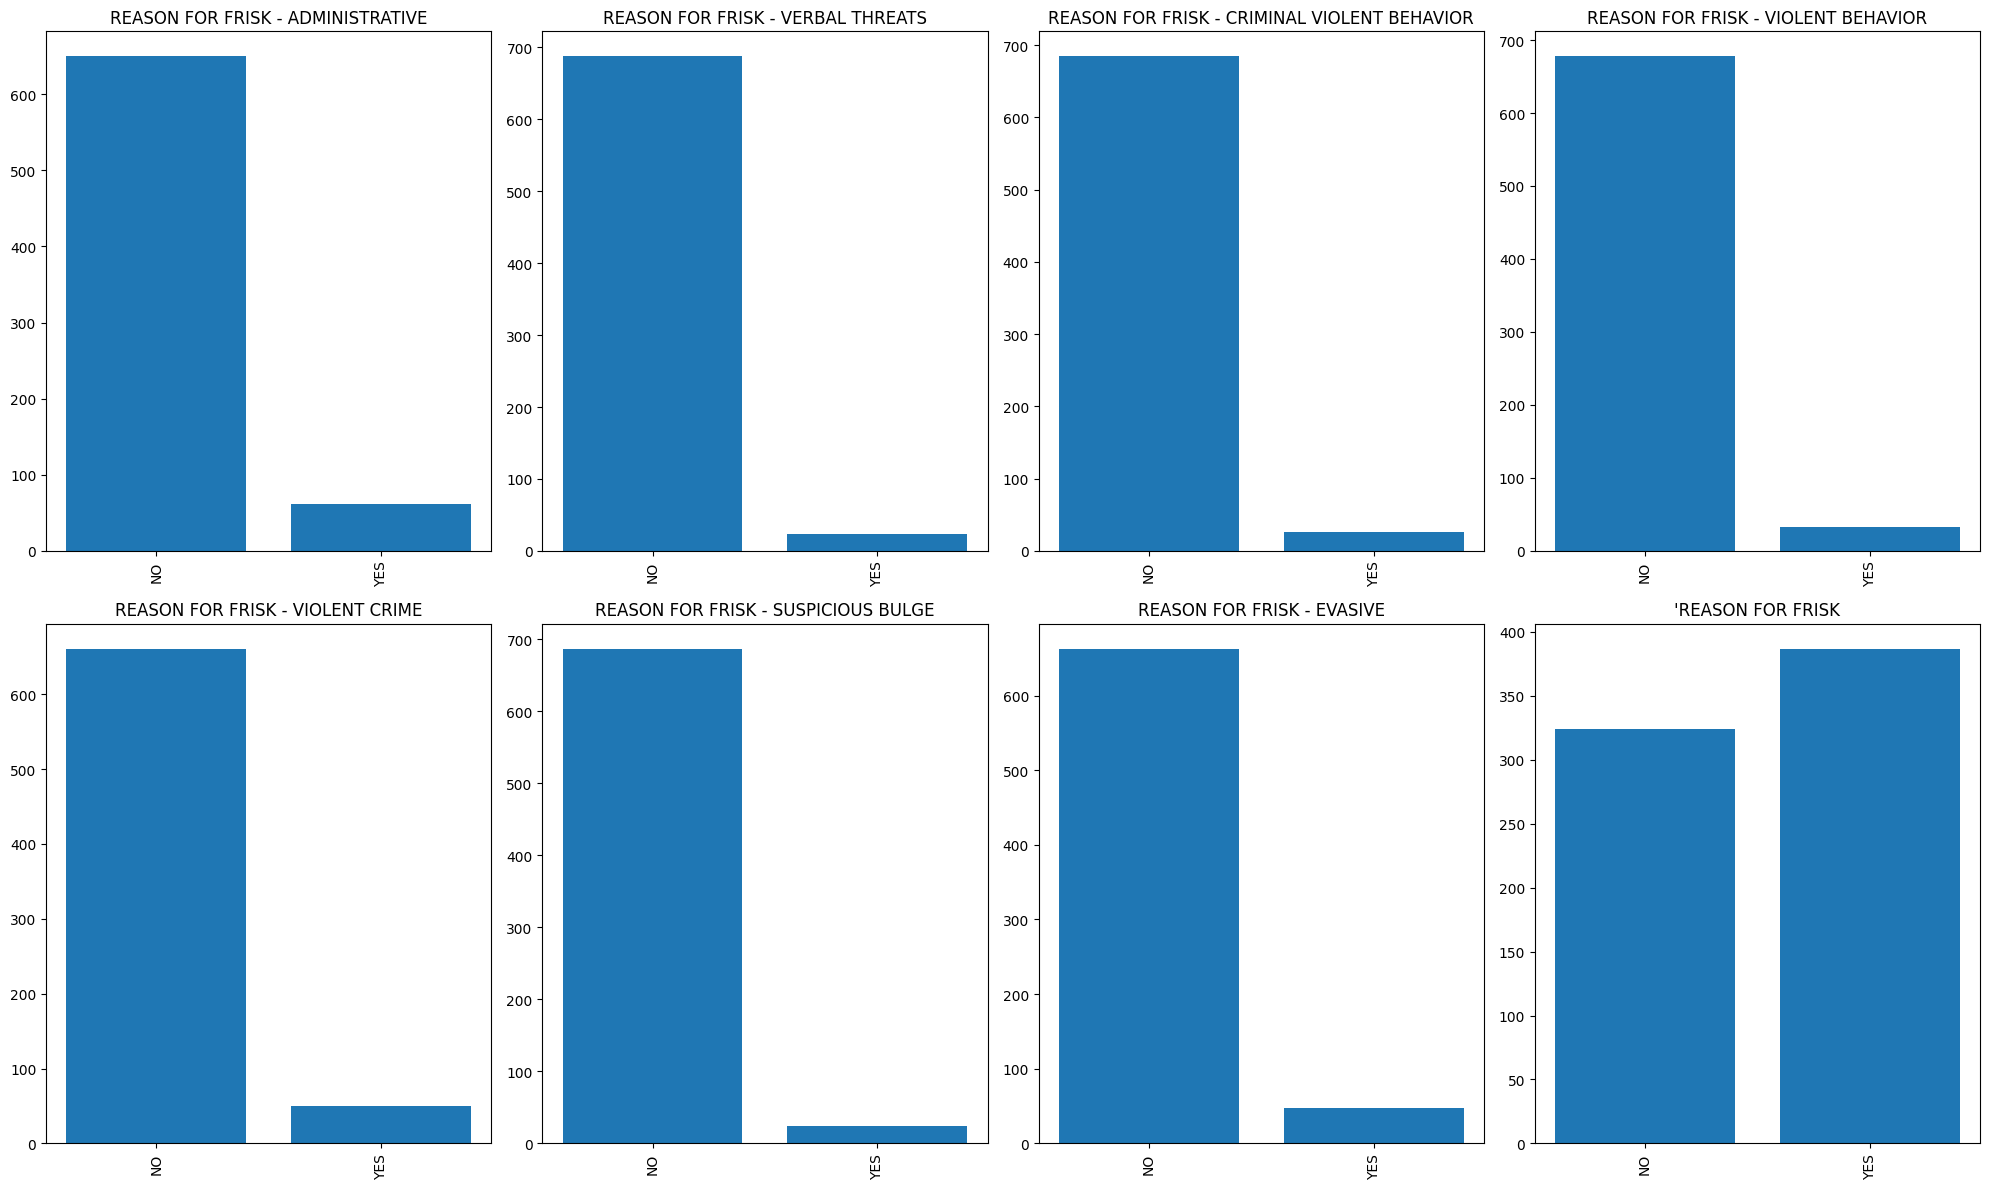

In [27]:
subset = df[df['PAT-DOWN FRISK CONDUCTED'] == 'YES']
subset = subset[['REASON FOR FRISK - ADMINISTRATIVE',
       'REASON FOR FRISK - VERBAL THREATS',
       'REASON FOR FRISK - CRIMINAL VIOLENT BEHAVIOR',
       'REASON FOR FRISK - VIOLENT BEHAVIOR',
       'REASON FOR FRISK - VIOLENT CRIME',
       'REASON FOR FRISK - SUSPICIOUS BULGE', 
       'REASON FOR FRISK - EVASIVE',
       'REASON FOR FRISK - OTHER']]

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
axs = axs.ravel()

for i, col in enumerate(subset.columns):
    data = subset[col]
    c = Counter(data)
    axs[i].bar(c.keys(), c.values())
    axs[i].set_xticklabels(c.keys(), rotation=90)
    axs[i].set_title(col)

plt.tight_layout()
plt.title("'REASON FOR FRISK")
plt.show()


In the graph below we can observer that W Park St has the heightest crime rate.

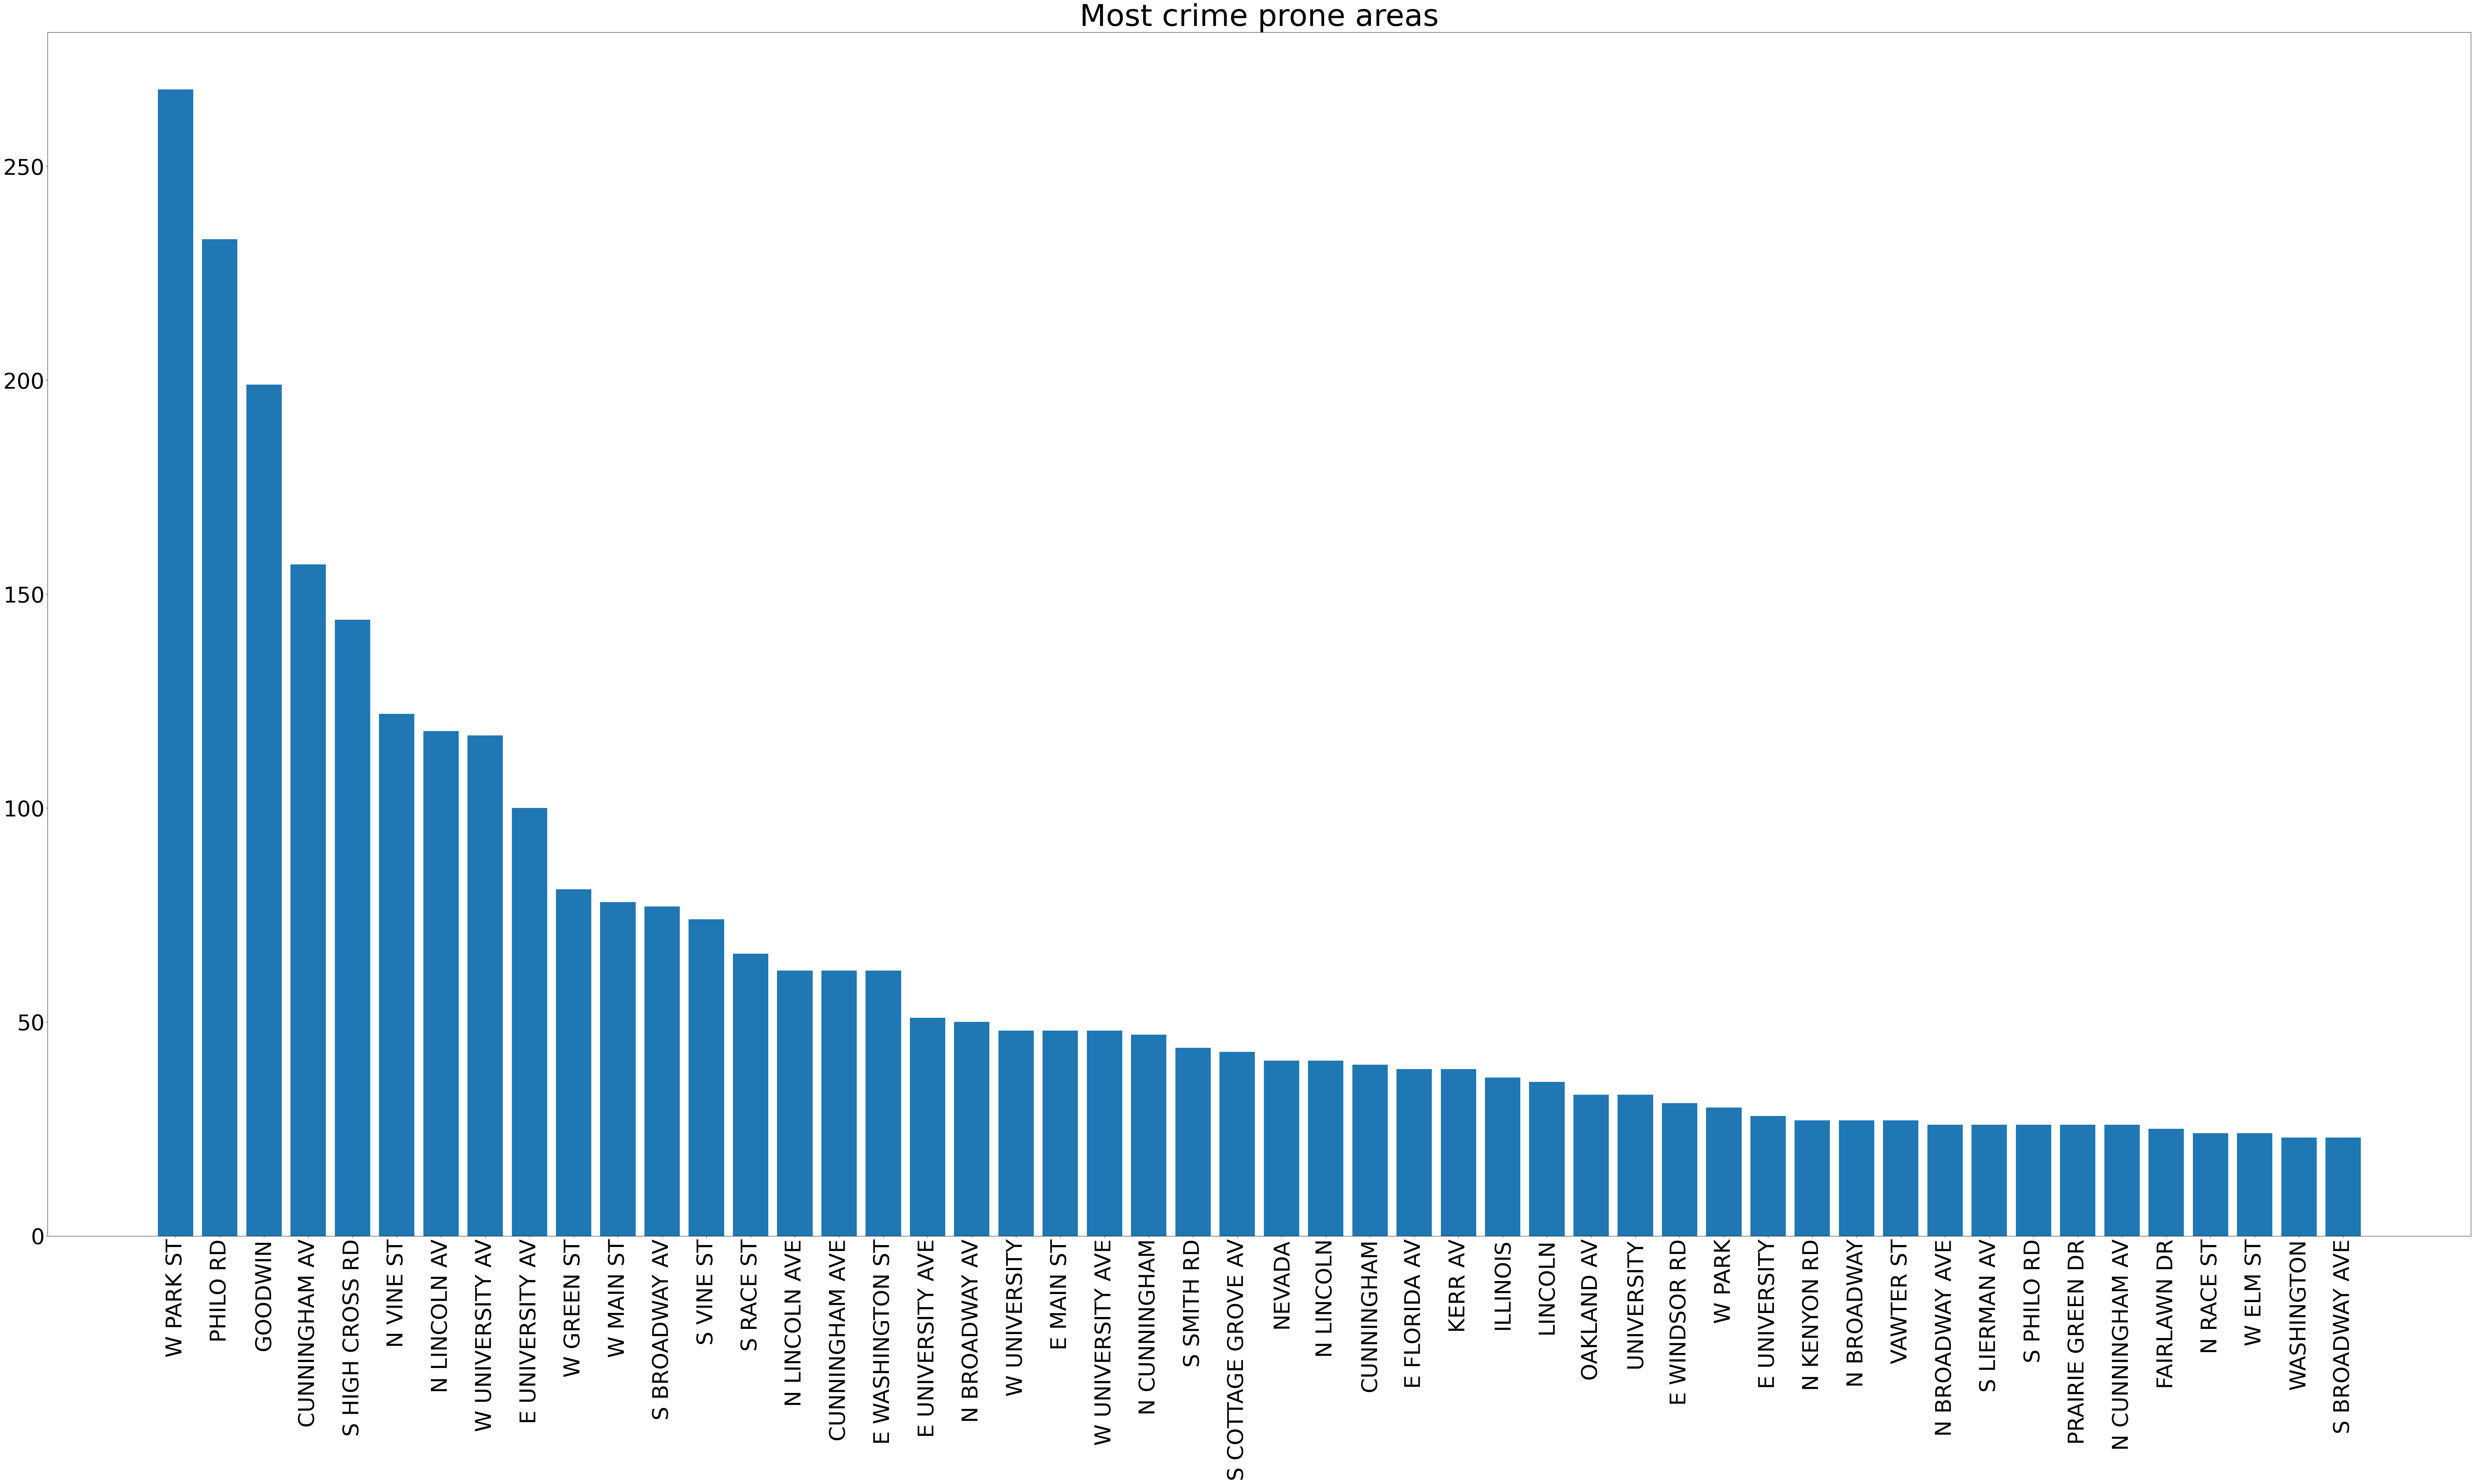

In [126]:
import numpy as np

c = Counter(df['ADDRESS STREET']) 
x = [str(x) for x in list(c.keys())]
y = [int(i) for i in list(c.values())]

subset = pd.DataFrame({"x": x, "y":y})
subset = subset.sort_values(["y"], ascending=False)
subset = subset.iloc[:50, :]
subset
plt.figure(figsize=(100, 50))
plt.bar(subset['x'], subset['y'])
plt.yticks(fontsize = 50)
plt.xticks(rotation = 90, fontsize = 50)
plt.title("Most crime prone areas", fontsize = 70)
plt.show()